In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error ,r2_score

In [2]:
# Load the dataset
boston = pd.read_csv('Housing.csv')
#boston = pd.read_csv('HousingData.csv')


In [3]:
#Transform dataset into dataframe
#data = data we want or the independent variables also known as x values
#feature_names = column names of the data
#target = the target variable or the price of the houses or dependent variables also known as y value
# df_x => will hold the x values of our data
# Assign data and target to variables

X = boston.iloc[:, :-1]  # Select all columns except the last one
Y = boston.iloc[:, -1]   # Select only the last column


In [4]:
# to get some statistics
print(X.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  486.000000  486.000000  486.000000  486.000000  506.000000  506.000000   
mean     3.611874   11.211934   11.083992    0.069959    0.554695    6.284634   
std      8.720192   23.388876    6.835896    0.255340    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.081900    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.253715    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.560263   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  486.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.518519    3.795043    9.549407  408.237154   18.455534  356.674032   
std     27.999513    2.1057

In [5]:
#initialize the linearRegression model
reg =linear_model.LinearRegression()

In [6]:
#split our dataset into 80% train 20% test

x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size=0.2 , random_state=42 , shuffle = True)

In [7]:
boston.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [8]:
#fill missing values with the mean in X & Y 

X_clean_train = x_train.fillna(X.mean())
Y_clean_train = y_train.fillna(Y.mean())

In [9]:
#Train the model with our training data
reg.fit(X_clean_train , Y_clean_train)

LinearRegression()

In [10]:
#print coeff (Weights) for each feature/column of our model
print(reg.coef_)

[-1.14139919e-01  2.90156278e-02 -2.71329054e-02  3.24067342e+00
 -1.60175433e+01  4.75240956e+00 -1.95196142e-02 -1.52159267e+00
  2.22822577e-01 -9.15063665e-03 -8.86045288e-01  1.22626115e-02
 -4.38440425e-01]


In [11]:
#fill missing values with the mean in X & Y 
X_clean_test= x_test.fillna(X.mean())
Y_clean_test= y_test.fillna(Y.mean())


In [12]:
#print our predictions on our test data

y_pred = reg.predict(X_clean_test)
print(y_pred)

[ 2.91432496e+01  3.65356675e+01  1.44925129e+01  2.50811104e+01
  1.84560923e+01  2.30104937e+01  1.81386861e+01  1.46265167e+01
  2.21158938e+01  2.08706364e+01  2.50758640e+01  1.87470982e+01
 -5.67498472e+00  2.17286655e+01  1.90464014e+01  2.54293420e+01
  1.96620047e+01  6.12420178e+00  4.09972355e+01  1.72352716e+01
  2.48905259e+01  3.02961849e+01  1.18008779e+01  2.29655895e+01
  1.73451595e+01  1.51051621e+01  2.10901065e+01  1.44883316e+01
  2.30923960e+01  1.94365043e+01  2.25439953e+01  2.52375663e+01
  2.59309510e+01  1.66289054e+01  1.64513986e+01  1.66143478e+01
  3.11105960e+01  2.02837991e+01  2.43569451e+01  2.26326769e+01
  1.45257750e+01  3.23698301e+01  4.30428488e+01  1.76390763e+01
  2.76326197e+01  1.64305143e+01  1.42484248e+01  2.61635938e+01
  1.97678160e+01  3.01463483e+01  2.09688785e+01  3.38338873e+01
  1.64161397e+01  2.63964842e+01  3.97974153e+01  2.20563187e+01
  1.86348862e+01  3.28326904e+01  2.54125467e+01  1.30089663e+01
  2.27876091e+01  3.07563

In [13]:
#print the actual values
print(Y_clean_test)

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
412    17.9
436     9.6
411    17.2
86     22.5
75     21.4
Name: MEDV, Length: 102, dtype: float64


In [14]:
#how good our model is doing (checking performance/accuracy of our model) Using Mean squared error(MSE)

print(np.mean((y_pred - Y_clean_test)**2))  # result if good if it close to 0 as possible

25.017672023842596


In [15]:
#checking performance/accuracy of our model Using Mean squared error(MSE) & sklearn.metrics
print(mean_squared_error(Y_clean_test , y_pred))
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')

25.017672023842596
R^2 Score: 0.6588520195508154


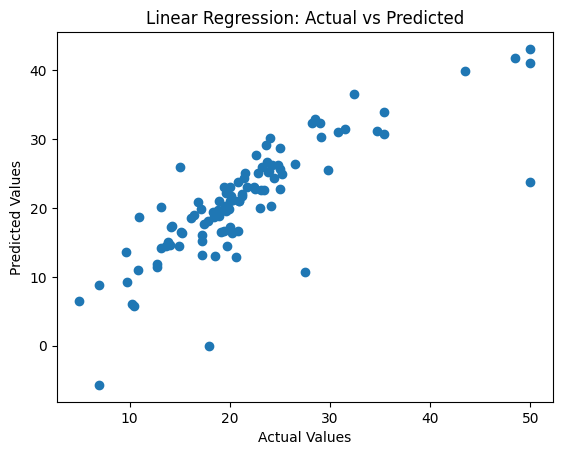

In [16]:
# Visualize the results
plt.scatter(Y_clean_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()